In [1]:
import ROOT as R
R.gStyle.SetOptFit(0)



def GetParameterList(version,method,syst):
    f = R.TFile('../output/Run2C_%smethod_%s_%s.root'%(method,syst,version))
    val = []
    for n in range(20):
        func = f.Get('func_28paras_run23_sjtu_Run2C_%smethod_%s_%s'%(method,syst,n))
        R_ = func.GetParameter(3)
        eR_ = func.GetParError(3)
        chi2 = func.GetChisquare()
        ndf = func.GetNDF()
        val.append([R_,eR_,chi2/ndf])
    return val


def GetGraphs(pars,range_x):
    graph_R = R.TGraphErrors()
    graph_chi2 = R.TGraph()
    range_n = map(lambda x:int(x/0.1),range_x)
    for n in range(*range_n):
        x = n*0.1
        np = graph_R.GetN()
        graph_R.SetPoint(np,x,pars[n][0])
        graph_R.SetPointError(np,0,pars[n][1])
        graph_chi2.SetPoint(np,x,pars[n][2])
    return graph_R,graph_chi2

def DrawChi2Cmp(method,syst,range_x,legPos):
    nameMap = {
    'gain_A':'In-fill gain amp.',
    'gain_T':'In-fill gain #tau',
    'stdp_A':'STDP amp.',
    'stdp_T':'STDP #tau',
    }    
    versions = ['Scan_fixseed_adhoc0','Scan_fixseed_adhoc1']
    colors = [R.kRed,R.kBlue]
    names = ['Randomized','Randomized+Ad-hoc']

    multi_g_chi2 = R.TMultiGraph()
    graphs_chi2 = []

    range_n = map(lambda x:int(x/0.1),range_x)
    for n in range(2):
        version = versions[n]
        
        pars = GetParameterList(version,method,syst)
        graph_R, graph_chi2 = GetGraphs(pars,range_x)

        graph_chi2.SetLineColor(colors[n])
        graph_chi2.SetTitle(names[n])
        graph_chi2.SetLineWidth(1)
        graph_chi2.SetMarkerStyle(8)
        graph_chi2.SetMarkerColor(colors[n])
        
        graph_chi2.SetMarkerSize(0.8)
        multi_g_chi2.Add(graph_chi2)
        graphs_chi2.append(graph_chi2)
        
        
    c = R.TCanvas()
    multi_g_chi2.Draw('ALP')
    multi_g_chi2.SetTitle('%s scan (%s-method);Multiplier;#chi^{2}/NDF'%(nameMap[syst],method))
    c.BuildLegend(*legPos)
    c.Draw()
    return c,multi_g_chi2,graph_chi2,graphs_chi2 

def DrawSensitivityCmp(method,syst,range_x,legPos,rangey=[-80,-60]):
    nameMap = {
    'gain_A':'In-fill gain amp.',
    'gain_T':'In-fill gain #tau',
    'stdp_A':'STDP amp.',
    'stdp_T':'STDP #tau',
    }

    versions = ['Scan','Scan_fixseed_adhoc0','Scan_fixseed_adhoc1']
    colors = [R.kBlack,R.kRed,R.kBlue]
    names = ['Raw','Randomized','Randomized+Ad-hoc']

    funcs = []
    graphs_R = []
    range_n = map(lambda x:int(x/0.1),range_x)
    c = R.TCanvas()
    
    multi_g_R = R.TMultiGraph()
    for n in range(1,3):
        version = versions[n]
        
        pars = GetParameterList(version,method,syst)
        graph_R, graph_chi2 = GetGraphs(pars,range_x)
        fit_func = R.TF1('fit_func%s'%(n),'[0]+[1]*x',range_x[0],range_x[1]-0.1)
        fit_func.SetParNames('Y-intercept','Sensitivity')
        fit_func.SetLineColor(colors[n])
        fit_func.SetNpx(5000)
        graph_R.Fit(fit_func)
        funcs.append(fit_func)
        fit_func.Draw('same')

        graph_R.SetLineColor(colors[n])
        graph_R.SetTitle(names[n])
        graph_R.SetLineWidth(1)
        graph_R.SetMarkerStyle(8)
        graph_R.SetMarkerColor(colors[n])
        
        graph_R.SetMarkerSize(0.8)
        multi_g_R.Add(graph_R)
        graphs_R.append(graph_R)

    multi_g_R.Draw('ALP')    
    multi_g_R.SetTitle('%s scan (%s-method);Multiplier;R [ppm]'%(nameMap[syst],method))
    multi_g_R.GetYaxis().SetRangeUser(*rangey)
    c.Draw()
    c.BuildLegend(*legPos)
    return c,funcs,graphs_R,multi_g_R

Welcome to JupyROOT 6.24/06


 FCN=0.000565756 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=8.64291e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.95010e+01   2.55490e-01   8.50846e-05  -2.98359e-10
   2  Sensitivity   9.24509e-02   2.33853e-01   7.78791e-05  -3.27186e-10
 FCN=0.0003267 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=4.00527e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.94657e+01   2.50012e-01   8.65960e-05   6.38904e-10
   2  Sensitivity   9.51416e-02   2.29214e-01   7.93921e-05   7.05483e-10


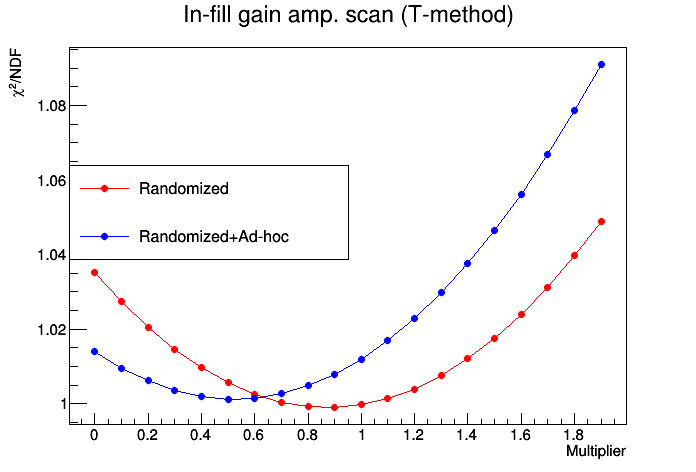

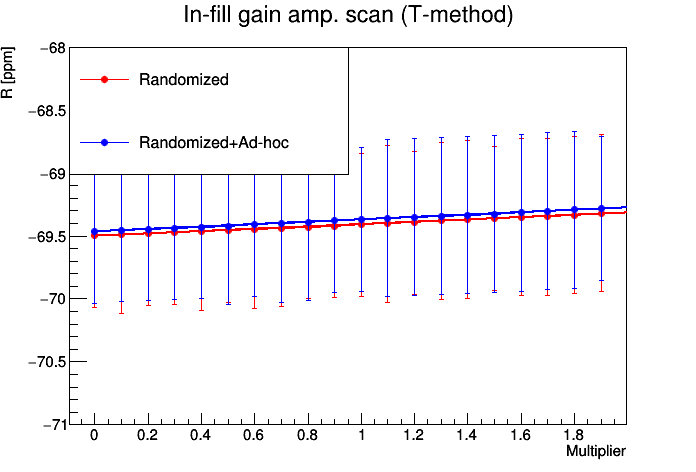

In [21]:
# compare chi2 cross versions
method = 'T'
syst = 'gain_A'
range_x = [0.,2.]
legPos = [0.1,0.45,0.5,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)

legPos = [0.1,0.63,0.5,0.9]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)

 FCN=5.21888e-05 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=8.82179e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.94131e+01   2.49609e-01   7.53738e-05  -3.46616e-10
   2  Sensitivity   2.21973e-03   1.87853e-01   5.67256e-05  -4.81452e-10
 FCN=2.97925e-05 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=4.30802e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.93693e+01   2.53683e-01   8.44441e-05   6.78259e-10
   2  Sensitivity   1.83307e-03   2.28500e-01   7.60613e-05   7.47063e-10


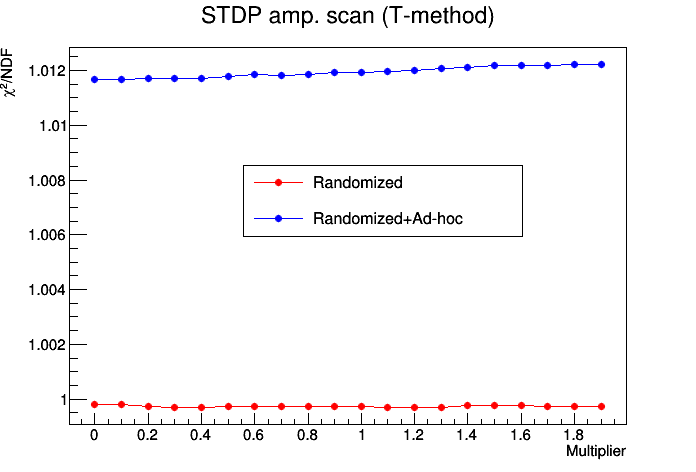

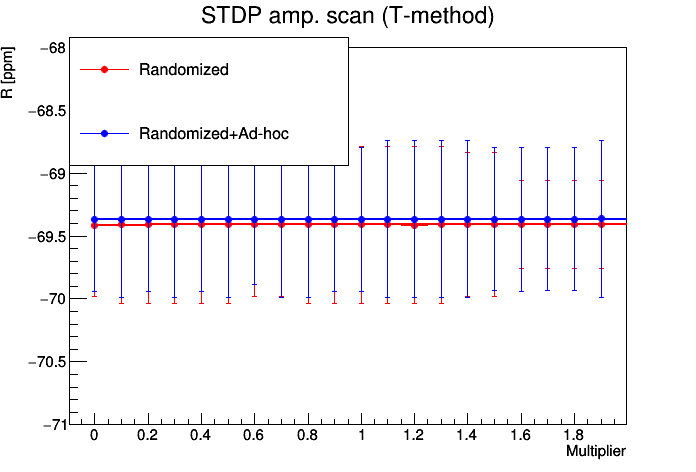

In [22]:
method = 'T'
syst = 'stdp_A'
range_x = [0.,2.]
legPos = [0.35,0.5,0.75,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)





legPos = [0.1,0.65,0.5,0.92]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)